Implementation of ANN

In [ ]:
# Importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
# Checking version of tensorflow and keras
print('Tensorflow version :', tf.__version__)
print('keras version :', tf.keras.__version__)

Tensorflow version : 2.12.0
keras version : 2.12.0


In [ ]:
os.getcwd()

'/content'

GPU/CPU check

In [ ]:
tf.config.list_physical_devices("GPU")

[]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
check_list = ['GPU', 'CPU']

for device in check_list:
  out = tf.config.list_logical_devices(device)
  if len(out)>0:
    print(f"{device} is available!")
    print(f"Details >>{out}")
  else:
    print(f"{device} isn't available!")

GPU isn't available!
CPU is available!
Details >>[LogicalDevice(name='/device:CPU:0', device_type='CPU')]


Creating a simple classifier using keras on MNIST Dataset

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
(x_train_full, y_train_full),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train_full.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
print(f"Data type of x_train_full: {x_train_full.dtype},\n shape of x_train_full :{x_train_full.shape}")

Data type of x_train_full: uint8,
 shape of x_train_full :(60000, 28, 28)


In [ ]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
len(x_test[1][0])

28

In [ ]:
# Create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255 as its an unsigned data

x_valid, x_train = x_train_full[:5000]/255., x_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Scale the test as well
x_test = x_test/255.

#train- 55000
#test - 1000
#val - 5000

In [ ]:
len(x_train)

55000

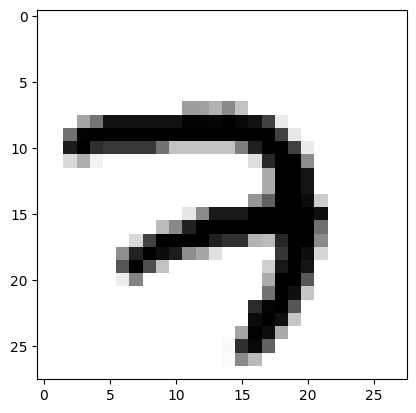

In [ ]:
#let's view some data
plt.imshow(x_train[0], cmap ="binary")
plt.show()

<Axes: >

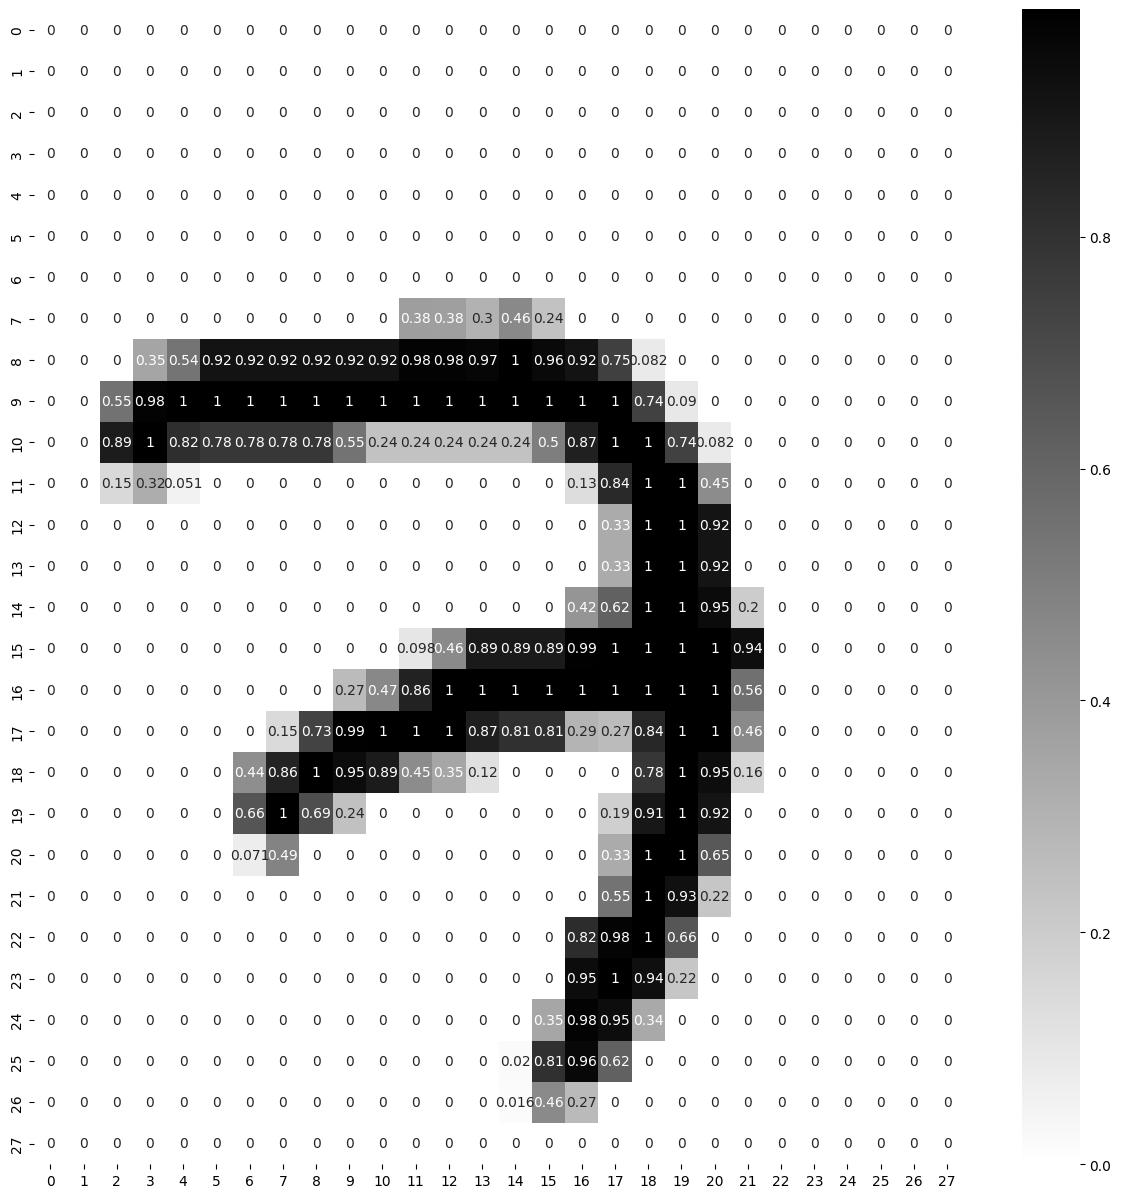

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0], annot = True, cmap = "binary")

In [ ]:
28*28

784

In [ ]:
# Creating layers of ANN

Layers = [tf.keras.layers.Flatten(input_shape=[28,28], name = "inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name = "hiddenLayer2"),
          tf.keras.layers.Dense(10, activation = "softmax", name = "outputLayer")]

# Our model run in sequence so:
model_clf = tf.keras.models.Sequential(Layers)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# firstlayer * secondlayer + bias
print(784*300+300)
print(300*100+100)
100*10+10

235500
30100


1010

In [ ]:
# Total parameters to be trained
sum((235500, 30100,1010))

266610

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name
## Weight and bias array will come

'hiddenLayer1'

In [ ]:
hidden1.get_weights()

[array([[-0.05771203, -0.02874194, -0.02561431, ...,  0.0395138 ,
         -0.00818778, -0.04895797],
        [-0.04211057, -0.05142755, -0.07293841, ..., -0.0474124 ,
          0.00927782, -0.06099173],
        [ 0.00859273, -0.04292142,  0.01876759, ..., -0.07315609,
          0.03509949, -0.05069369],
        ...,
        [-0.02340263,  0.03391527,  0.01346315, ...,  0.04382767,
          0.02224056, -0.03262681],
        [-0.04998156, -0.06932712,  0.03389627, ...,  0.0242071 ,
          0.00614152,  0.02699561],
        [-0.04507779,  0.04514275,  0.0089687 , ..., -0.02136619,
          0.04774995, -0.02122627]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
hidden1.get_weights()[0].shape

(784, 300)

In [ ]:
hidden1.get_weights()[1].shape

(300,)

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
print("Shape\n", weights.shape, "\n")
weights

Shape
 (784, 300) 



array([[-0.05771203, -0.02874194, -0.02561431, ...,  0.0395138 ,
        -0.00818778, -0.04895797],
       [-0.04211057, -0.05142755, -0.07293841, ..., -0.0474124 ,
         0.00927782, -0.06099173],
       [ 0.00859273, -0.04292142,  0.01876759, ..., -0.07315609,
         0.03509949, -0.05069369],
       ...,
       [-0.02340263,  0.03391527,  0.01346315, ...,  0.04382767,
         0.02224056, -0.03262681],
       [-0.04998156, -0.06932712,  0.03389627, ...,  0.0242071 ,
         0.00614152,  0.02699561],
       [-0.04507779,  0.04514275,  0.0089687 , ..., -0.02136619,
         0.04774995, -0.02122627]], dtype=float32)

In [ ]:
print("Shape\n", biases.shape, "\n")
biases

Shape
 (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.2)
METRICS = ["accuracy"]

model_clf.compile(loss = LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics = METRICS)

In [ ]:
# TRAINING

EPOCHS = 30
VALIDATION_SET = (x_valid, y_valid)

history = model_clf.fit(x_train, y_train, epochs = EPOCHS, validation_data =VALIDATION_SET, batch_size = 32 )

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6348 - accuracy: 0.8336 - val_loss: 0.3104 - val_accuracy: 0.9122
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2919 - accuracy: 0.9176 - val_loss: 0.2470 - val_accuracy: 0.9298
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2396 - accuracy: 0.9312 - val_loss: 0.2065 - val_accuracy: 0.9418
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2056 - accuracy: 0.9415 - val_loss: 0.1834 - val_accuracy: 0.9502
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1796 - accuracy: 0.9486 - val_loss: 0.1610 - val_accuracy: 0.9542
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1602 - accuracy: 0.9536 - val_loss: 0.1485 - val_accuracy: 0.9594
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1442 - accuracy: 0.9588 - val_loss: 0.1389 - val_accuracy:

In [ ]:
histroy.params

NameError: ignored

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.634849,0.833600,0.310355,0.9122
1,0.291949,0.917582,0.247007,0.9298
2,0.239644,0.931218,0.206487,0.9418
3,0.205578,0.941455,0.183370,0.9502
4,0.179638,0.948636,0.160960,0.9542
5,0.160171,0.953564,0.148480,0.9594
6,0.144184,0.958764,0.138928,0.9610
7,0.130579,0.962509,0.125066,0.9656
8,0.119435,0.966055,0.119487,0.9664
9,0.109092,0.969418,0.125022,0.9634


<Axes: >

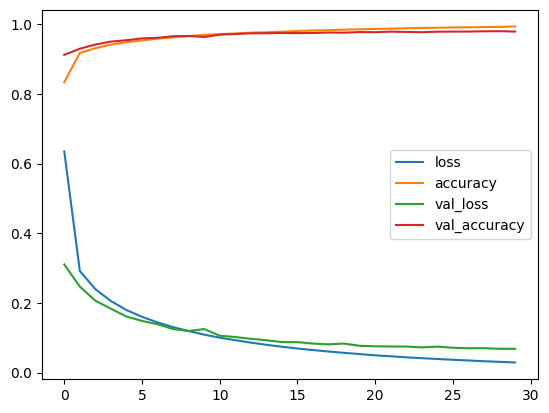

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0702 - accuracy: 0.9770


[0.07018935680389404, 0.9769999980926514]

In [ ]:
# sample check test
x_new = x_test[:3]
# x_new

<Axes: >

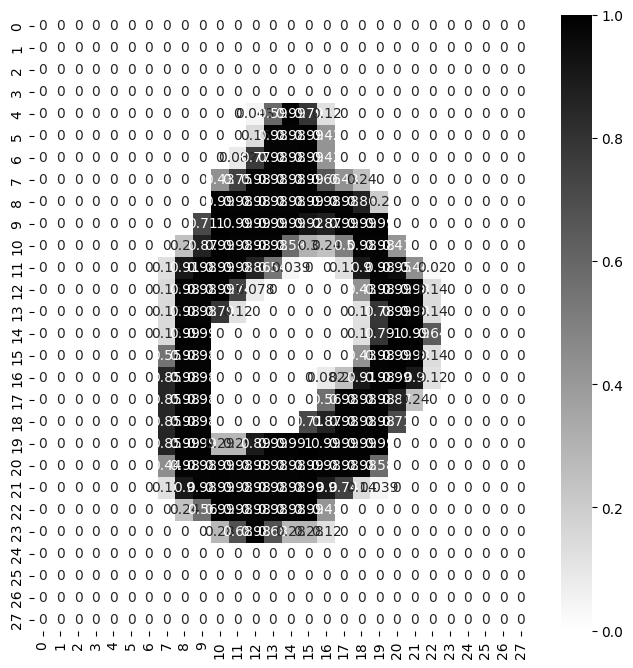

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(x_test[3], annot = True, cmap = "binary")

In [ ]:
actual = y_test[:3]

In [ ]:
y_prob = model_clf.predict(x_new)
y_prob.round(2) # round to 2 decimal places

1/1 [==============================] - 0s 31ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_prob

array([[6.6672828e-06, 7.5985703e-08, 1.9220415e-05, 2.0593170e-04,
        3.8653528e-08, 4.1844103e-07, 2.1155010e-10, 9.9975449e-01,
        1.8160863e-06, 1.1304090e-05],
       [3.9818269e-06, 3.9084120e-05, 9.9846125e-01, 1.4662816e-03,
        7.1857793e-12, 4.0608739e-07, 1.6430786e-06, 3.2586919e-10,
        2.7398175e-05, 3.6153688e-11],
       [6.4336268e-06, 9.9585599e-01, 4.0767074e-04, 2.8846469e-05,
        1.2382338e-03, 2.7375852e-05, 9.8570134e-05, 2.0017910e-03,
        3.1568864e-04, 1.9357425e-05]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob, axis = -1)

In [ ]:
y_pred

array([7, 2, 1])

In [ ]:
actual

array([7, 2, 1], dtype=uint8)

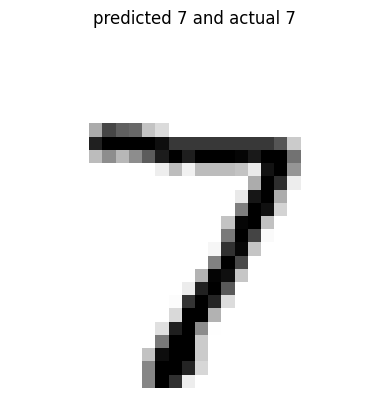

##########


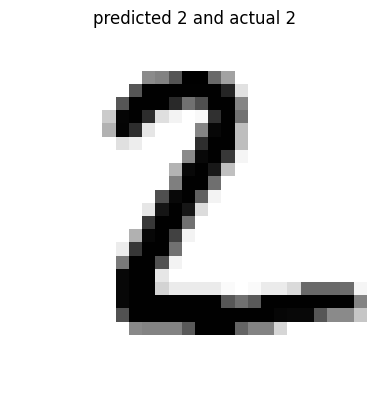

##########


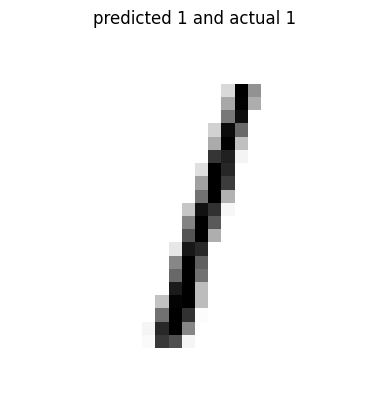

##########


In [ ]:
# Plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap='binary')
  plt.title(f"predicted {pred} and actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("##########")